In [1]:
import cv2 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn 
import imgaug 
import tensorflow as tf
%matplotlib inline

In [2]:
from sklearn.utils import shuffle

In [3]:
columns = ['Center','Left','Right','Steering','Throttle','Brake','Speed']

In [4]:
data = pd.read_csv('driving_log.csv',names=columns)

In [5]:
data

Center  \
0      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\ce...   
1      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\ce...   
2      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\ce...   
3      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\ce...   
4      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\ce...   
...                                                  ...   
17718  C:\Users\bathu\OneDrive\Desktop\track-2\IMG\ce...   
17719  C:\Users\bathu\OneDrive\Desktop\track-2\IMG\ce...   
17720  C:\Users\bathu\OneDrive\Desktop\track-2\IMG\ce...   
17721  C:\Users\bathu\OneDrive\Desktop\track-2\IMG\ce...   
17722  C:\Users\bathu\OneDrive\Desktop\track-2\IMG\ce...   

                                                    Left  \
0       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
1       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
2       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
3       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
4       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
...                                                  ...   
17718   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
17719   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
17720   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
17721   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
17722   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   

                                                   Right  Steering  Throttle  \
0       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
1       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
2       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
3       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
4       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
...                                                  ...       ...       ...   
17718   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
17719   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
17720   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
17721   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
17722   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   

          Brake     Speed  
0      0.000000  4.257014  
1      0.000000  4.276082  
2      0.000000  4.295955  
3      0.000000  4.315593  
4      0.000000  4.334994  
...         ...       ...  
17718  1.000000  0.188935  
17719  1.000000  0.079301  
17720  1.000000  0.350776  
17721  1.000000  0.596883  
17722  0.904182  0.827538  

[17723 rows x 7 columns]

In [6]:
data['Center'][0].split('\\')[7]

'center_2023_06_02_17_34_40_470.jpg'

In [7]:
def getname(X):
    return X.split('\\')[7]

In [8]:
getname(data['Center'][0])

'center_2023_06_02_17_34_40_470.jpg'

In [9]:
data['Center']=data['Center'].apply(getname)

In [10]:
data.head()

Center  \
0  center_2023_06_02_17_34_40_470.jpg   
1  center_2023_06_02_17_34_40_572.jpg   
2  center_2023_06_02_17_34_40_673.jpg   
3  center_2023_06_02_17_34_40_776.jpg   
4  center_2023_06_02_17_34_40_877.jpg   

                                                Left  \
0   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
1   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
2   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
3   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
4   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   

                                               Right  Steering  Throttle  \
0   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
1   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
2   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
3   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
4   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   

   Brake     Speed  
0    0.0  4.257014  
1    0.0  4.276082  
2    0.0  4.295955  
3    0.0  4.315593  
4    0.0  4.334994

In [11]:
data.shape[0]

17723

In [12]:
data.head()

Center  \
0  center_2023_06_02_17_34_40_470.jpg   
1  center_2023_06_02_17_34_40_572.jpg   
2  center_2023_06_02_17_34_40_673.jpg   
3  center_2023_06_02_17_34_40_776.jpg   
4  center_2023_06_02_17_34_40_877.jpg   

                                                Left  \
0   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
1   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
2   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
3   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
4   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   

                                               Right  Steering  Throttle  \
0   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
1   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
2   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
3   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   
4   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...       0.0       0.0   

   Brake     Speed  
0    0.0  4.257014  
1    0.0  4.276082  
2    0.0  4.295955  
3    0.0  4.315593  
4    0.0  4.334994

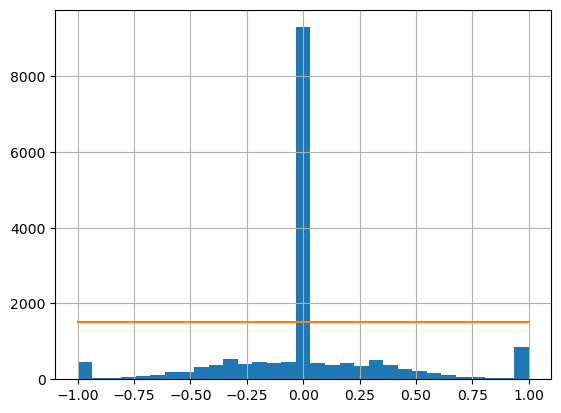

In [13]:
data['Steering'].hist(bins=31)
plt.plot((-1,1),(1500,1500))

In [18]:
def balanceData(data,display=True):
    nBins=31
    samplesPerBin = 1500
    hist,bins = np.histogram(data['Steering'],nBins)
    print(bins)
    if display:
        center = (bins[:-1]+bins[1:])*0.5
        print(center)
        plt.bar(center,hist,width=0.06)
        plt.plot((-1,1),(samplesPerBin,samplesPerBin))
    removeindexlist = []
    for j in range(nBins):
        bindatalist = []
        for i in range(len(data['Steering'])):
            if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j+1]:
                bindatalist.append(i)
        bindatalist = shuffle(bindatalist)
        bindatalist = bindatalist[samplesPerBin:]
        removeindexlist.extend(bindatalist)
    print('removed list :', len(removeindexlist))
    data.drop(data.index[removeindexlist],inplace = True)
    print('remaining images: ', len(data))
    if display:
        hist =np.histogram(data['Steering'],nBins)
        plt.bar(center,hist,width = 0.06)
        plt.plot((-1,1),(samplesPerBinPerBin,samplesPerBin))
    return data

In [19]:
data = balanceData(data,display=False)

[-1.         -0.93548387 -0.87096774 -0.80645161 -0.74193548 -0.67741935
 -0.61290323 -0.5483871  -0.48387097 -0.41935484 -0.35483871 -0.29032258
 -0.22580645 -0.16129032 -0.09677419 -0.03225806  0.03225806  0.09677419
  0.16129032  0.22580645  0.29032258  0.35483871  0.41935484  0.48387097
  0.5483871   0.61290323  0.67741935  0.74193548  0.80645161  0.87096774
  0.93548387  1.        ]


KeyError: 0

<Axes: >

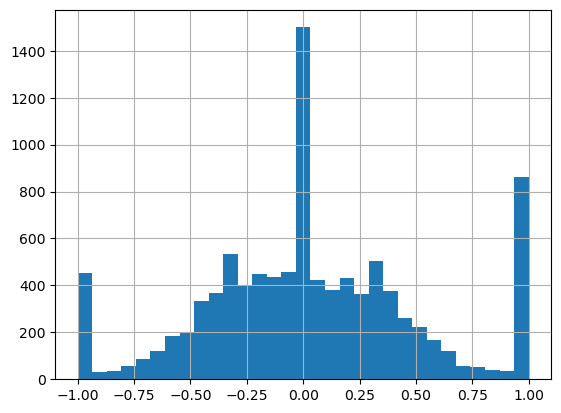

In [20]:
data['Steering'].hist(bins=31)

In [36]:
data

Center  \
8      center_2023_06_02_17_34_41_285.jpg   
10     center_2023_06_02_17_34_41_490.jpg   
12     center_2023_06_02_17_34_41_695.jpg   
13     center_2023_06_02_17_34_41_796.jpg   
14     center_2023_06_02_17_34_41_896.jpg   
...                                   ...   
17664  center_2023_06_02_18_05_04_339.jpg   
17674  center_2023_06_02_18_05_05_393.jpg   
17697  center_2023_06_02_18_05_07_779.jpg   
17707  center_2023_06_02_18_05_08_800.jpg   
17720  center_2023_06_02_18_05_10_137.jpg   

                                                    Left  \
8       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
10      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
12      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
13      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
14      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
...                                                  ...   
17664   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
17674   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
17697   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
17707   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   
17720   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...   

                                                   Right  Steering  Throttle  \
8       C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...  0.000000       0.0   
10      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...  0.000000       0.0   
12      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r... -0.310501       0.0   
13      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r... -0.611311       0.0   
14      C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r... -0.899924       0.0   
...                                                  ...       ...       ...   
17664   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...  0.000000       0.0   
17674   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...  0.000000       0.0   
17697   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...  0.000000       0.0   
17707   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...  0.000000       0.0   
17720   C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...  0.000000       0.0   

          Brake      Speed  
8      0.000000   4.413924  
10     0.000000   4.452353  
12     0.000000   4.481292  
13     0.000000   4.463940  
14     0.000000   4.422840  
...         ...        ...  
17664  0.000000  28.820130  
17674  0.970075  22.167180  
17697  0.376283   3.428097  
17707  0.677948   3.262332  
17720  1.000000   0.350776  

[9934 rows x 7 columns]

In [22]:
for i in range(len(data)):
    indexeddata = data.iloc[i]
    print(indexeddata)

Center                     center_2023_06_02_17_34_41_285.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                                  0.0
Brake                                                     0.0
Speed                                                4.413924
Name: 8, dtype: object
Center                     center_2023_06_02_17_34_41_490.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                                  0.0
Brake                                                     0.0
Speed                                                4.452353
Name: 10, dtype: object
Center                     center_2023_06_02_17_34_41_695.jpg
Left         C:\Users\b

Center                     center_2023_06_02_17_35_43_732.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.486962
Throttle                                                  0.0
Brake                                                     0.0
Speed                                                28.02594
Name: 617, dtype: object
Center                     center_2023_06_02_17_35_43_831.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             -0.19842
Throttle                                                  0.0
Brake                                                     0.0
Speed                                                27.83155
Name: 618, dtype: object
Center                     center_2023_06_02_17_35_43_934.jpg
Left         C:\User

Center                     center_2023_06_02_17_36_34_268.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.125509
Throttle                                             0.907246
Brake                                                     0.0
Speed                                                22.45659
Name: 1111, dtype: object
Center                     center_2023_06_02_17_36_34_371.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.319124
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                23.35975
Name: 1112, dtype: object
Center                     center_2023_06_02_17_36_34_781.jpg
Left         C:\Us

Center                     center_2023_06_02_17_37_08_823.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.335809
Throttle                                             0.041618
Brake                                                     0.0
Speed                                                26.12104
Name: 1447, dtype: object
Center                     center_2023_06_02_17_37_09_025.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                             0.698513
Brake                                                     0.0
Speed                                                26.43174
Name: 1449, dtype: object
Center                     center_2023_06_02_17_37_09_126.jpg
Left         C:\Us

Center                     center_2023_06_02_17_38_12_195.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.539552
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.15803
Name: 2061, dtype: object
Center                     center_2023_06_02_17_38_12_301.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.239428
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.19135
Name: 2062, dtype: object
Center                     center_2023_06_02_17_38_12_405.jpg
Left         C:\Us

Center                     center_2023_06_02_17_39_17_450.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.088708
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.17313
Name: 2695, dtype: object
Center                     center_2023_06_02_17_39_17_656.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.18354
Name: 2697, dtype: object
Center                     center_2023_06_02_17_39_17_861.jpg
Left         C:\Us

Center                     center_2023_06_02_17_40_23_579.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  1.0
Throttle                                                  0.0
Brake                                                     0.0
Speed                                                3.007497
Name: 3337, dtype: object
Center                     center_2023_06_02_17_40_23_678.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  1.0
Throttle                                                  0.0
Brake                                                     0.0
Speed                                                3.085456
Name: 3338, dtype: object
Center                     center_2023_06_02_17_40_23_779.jpg
Left         C:\Us

Center                     center_2023_06_02_17_41_06_634.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.534929
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.28746
Name: 3755, dtype: object
Center                     center_2023_06_02_17_41_06_739.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.834607
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.12831
Name: 3756, dtype: object
Center                     center_2023_06_02_17_41_06_845.jpg
Left         C:\Us

Center                     center_2023_06_02_17_42_27_264.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.801419
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.10319
Name: 4535, dtype: object
Center                     center_2023_06_02_17_42_27_371.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.505181
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                  30.201
Name: 4536, dtype: object
Center                     center_2023_06_02_17_42_27_476.jpg
Left         C:\Us

Center                     center_2023_06_02_17_43_24_734.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.281428
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.20316
Name: 5092, dtype: object
Center                     center_2023_06_02_17_43_24_840.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.577222
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.14909
Name: 5093, dtype: object
Center                     center_2023_06_02_17_43_24_942.jpg
Left         C:\Us

Center                     center_2023_06_02_17_44_05_890.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                 -1.0
Throttle                                              0.34384
Brake                                                     0.0
Speed                                                4.293036
Name: 5490, dtype: object
Center                     center_2023_06_02_17_44_05_995.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                 -1.0
Throttle                                             0.030746
Brake                                                     0.0
Speed                                                 4.43102
Name: 5491, dtype: object
Center                     center_2023_06_02_17_44_06_098.jpg
Left         C:\Us

Center                     center_2023_06_02_17_44_54_232.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.213729
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.18944
Name: 5960, dtype: object
Center                     center_2023_06_02_17_44_54_335.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             -0.39174
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.15136
Name: 5961, dtype: object
Center                     center_2023_06_02_17_44_54_439.jpg
Left         C:\Us

Center                     center_2023_06_02_17_45_54_136.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.17324
Name: 6538, dtype: object
Center                     center_2023_06_02_17_45_57_041.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                 30.2089
Name: 6566, dtype: object
Center                     center_2023_06_02_17_45_57_249.jpg
Left         C:\Us

Center                     center_2023_06_02_17_47_02_019.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.379944
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                 30.1383
Name: 7195, dtype: object
Center                     center_2023_06_02_17_47_02_124.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.079832
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.16122
Name: 7196, dtype: object
Center                     center_2023_06_02_17_47_02_323.jpg
Left         C:\Us

Center                     center_2023_06_02_17_47_53_633.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                             0.320326
Brake                                                     0.0
Speed                                                30.05759
Name: 7696, dtype: object
Center                     center_2023_06_02_17_47_53_736.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                             0.018095
Brake                                                     0.0
Speed                                                 29.9772
Name: 7697, dtype: object
Center                     center_2023_06_02_17_47_53_937.jpg
Left         C:\Us

Center                     center_2023_06_02_17_48_53_910.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.092474
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.20638
Name: 8279, dtype: object
Center                     center_2023_06_02_17_48_54_011.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.109916
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.16311
Name: 8280, dtype: object
Center                     center_2023_06_02_17_48_54_112.jpg
Left         C:\Us

Center                     center_2023_06_02_17_50_09_106.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.307279
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.15091
Name: 9006, dtype: object
Center                     center_2023_06_02_17_50_10_442.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.20782
Name: 9019, dtype: object
Center                     center_2023_06_02_17_50_11_367.jpg
Left         C:\Us

Center                     center_2023_06_02_17_51_12_655.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  1.0
Throttle                                                  0.0
Brake                                                     1.0
Speed                                                0.601007
Name: 9619, dtype: object
Center                     center_2023_06_02_17_51_12_759.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  1.0
Throttle                                                  0.0
Brake                                                     1.0
Speed                                                0.901544
Name: 9620, dtype: object
Center                     center_2023_06_02_17_51_12_859.jpg
Left         C:\Us

Center                     center_2023_06_02_17_52_04_395.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.616926
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.13434
Name: 10119, dtype: object
Center                     center_2023_06_02_17_52_04_497.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.369587
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.17913
Name: 10120, dtype: object
Center                     center_2023_06_02_17_52_04_597.jpg
Left         C:\

Center                     center_2023_06_02_17_52_57_706.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.340385
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.14966
Name: 10635, dtype: object
Center                     center_2023_06_02_17_52_57_810.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.032281
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.17421
Name: 10636, dtype: object
Center                     center_2023_06_02_17_52_58_016.jpg
Left         C:\

Center                     center_2023_06_02_17_53_57_243.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                 30.1619
Name: 11210, dtype: object
Center                     center_2023_06_02_17_53_57_347.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.15927
Name: 11211, dtype: object
Center                     center_2023_06_02_17_53_57_456.jpg
Left         C:\

Center                     center_2023_06_02_17_54_43_374.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                 -1.0
Throttle                                                  0.0
Brake                                                     0.0
Speed                                                2.004828
Name: 11656, dtype: object
Center                     center_2023_06_02_17_54_43_474.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                 -1.0
Throttle                                             0.191051
Brake                                                     0.0
Speed                                                2.005454
Name: 11657, dtype: object
Center                     center_2023_06_02_17_54_43_575.jpg
Left         C:\

Center                     center_2023_06_02_17_55_41_916.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.300838
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.16842
Name: 12223, dtype: object
Center                     center_2023_06_02_17_55_42_018.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.207131
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.18858
Name: 12224, dtype: object
Center                     center_2023_06_02_17_55_42_229.jpg
Left         C:\

Center                     center_2023_06_02_17_56_44_564.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.572962
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.14145
Name: 12829, dtype: object
Center                     center_2023_06_02_17_56_44_670.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             -0.29814
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.20737
Name: 12830, dtype: object
Center                     center_2023_06_02_17_56_45_079.jpg
Left         C:\

Center                     center_2023_06_02_17_57_54_771.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.456064
Throttle                                                  0.0
Brake                                                     0.0
Speed                                                 26.7431
Name: 13508, dtype: object
Center                     center_2023_06_02_17_57_54_874.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.308388
Throttle                                                  0.0
Brake                                                     0.0
Speed                                                26.68791
Name: 13509, dtype: object
Center                     center_2023_06_02_17_57_54_980.jpg
Left         C:\

Center                     center_2023_06_02_17_58_43_906.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.208031
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.17173
Name: 13984, dtype: object
Center                     center_2023_06_02_17_58_44_006.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.406753
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.14714
Name: 13985, dtype: object
Center                     center_2023_06_02_17_58_44_111.jpg
Left         C:\

Center                     center_2023_06_02_17_59_55_202.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.363683
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.17551
Name: 14674, dtype: object
Center                     center_2023_06_02_17_59_55_303.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.061222
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.18635
Name: 14675, dtype: object
Center                     center_2023_06_02_17_59_55_510.jpg
Left         C:\

Center                     center_2023_06_02_18_01_13_385.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.714756
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.08958
Name: 15430, dtype: object
Center                     center_2023_06_02_18_01_13_487.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.938264
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                29.94983
Name: 15431, dtype: object
Center                     center_2023_06_02_18_01_13_591.jpg
Left         C:\

Center                     center_2023_06_02_18_02_02_952.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.019225
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.15632
Name: 15910, dtype: object
Center                     center_2023_06_02_18_02_03_056.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.333682
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.20729
Name: 15911, dtype: object
Center                     center_2023_06_02_18_02_03_159.jpg
Left         C:\

Center                     center_2023_06_02_18_03_08_571.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.459789
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.52008
Name: 16545, dtype: object
Center                     center_2023_06_02_18_03_08_679.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                            -0.759994
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.01244
Name: 16546, dtype: object
Center                     center_2023_06_02_18_03_08_785.jpg
Left         C:\

Center                     center_2023_06_02_18_03_56_232.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.632243
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.13848
Name: 17006, dtype: object
Center                     center_2023_06_02_18_03_56_335.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.494677
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.18472
Name: 17007, dtype: object
Center                     center_2023_06_02_18_03_56_440.jpg
Left         C:\

Center                     center_2023_06_02_18_04_49_781.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                             0.282766
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.22206
Name: 17523, dtype: object
Center                     center_2023_06_02_18_04_49_983.jpg
Left         C:\Users\bathu\OneDrive\Desktop\track-2\IMG\l...
Right        C:\Users\bathu\OneDrive\Desktop\track-2\IMG\r...
Steering                                                  0.0
Throttle                                                  1.0
Brake                                                     0.0
Speed                                                30.22211
Name: 17525, dtype: object
Center                     center_2023_06_02_18_04_50_502.jpg
Left         C:\

In [23]:
path = r'C:\Users\bathu\track-2'

In [24]:
import os

In [25]:
imagesPath = []
steering = []
for i in range(len(data)):
    indexeddata = data.iloc[i]
    imagesPath.append(os.path.join(path,'IMG',indexeddata[0]))
    steering.append(float(indexeddata[3]))
imagesPath = np.asarray(imagesPath)
steering = np.asarray(steering)

    

In [26]:
imagesPath

array(['C:\\Users\\bathu\\track-2\\IMG\\center_2023_06_02_17_34_41_285.jpg',
       'C:\\Users\\bathu\\track-2\\IMG\\center_2023_06_02_17_34_41_490.jpg',
       'C:\\Users\\bathu\\track-2\\IMG\\center_2023_06_02_17_34_41_695.jpg',
       ...,
       'C:\\Users\\bathu\\track-2\\IMG\\center_2023_06_02_18_05_07_779.jpg',
       'C:\\Users\\bathu\\track-2\\IMG\\center_2023_06_02_18_05_08_800.jpg',
       'C:\\Users\\bathu\\track-2\\IMG\\center_2023_06_02_18_05_10_137.jpg'],
      dtype='<U61')

In [27]:
steering.dtype

dtype('float64')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_val, y_train, y_val = train_test_split(imagesPath, steering, test_size=0.2, random_state=42)

In [30]:
len(X_train)

7947

In [31]:
X_val.shape

(1987,)

In [32]:
import matplotlib.image as mpimg

In [33]:
from imgaug import augmenters as iaa

In [34]:
len(imagesPath)

9934

In [37]:
def augmentImage(imgPath,steering):
    img = mpimg.imread(imgPath)
    if np.random.rand() < 0.5:
        pan = iaa.Affine(translate_percent ={'x' : (-0.1,0.1), 'y' : (-0.1,0.1)})
        img = pan.augment_image(img)
    if np.random.rand() < 0.5:
        zoom = iaa.Affine(scale=(1,1.2))
        img = zoom.augment_image(img)
    if np.random.rand() < 0.5:
        brightness = iaa.Multiply((0.4,1.2))
        img = brightness.augment_image(img)
    if np.random.rand() < 0.5:
        img = cv2.flip(img,1)
        steering = -steering
    return img,steering    

In [38]:
def preprocessing(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(200,66))
    img = img / 255
    return img

In [40]:
import random

In [81]:
def batchgenerator(imagesPath,steeringlist,batchsize,trainflag):
    while True:
        imgbatch =[]
        steeringbatch = []
        for i in range(batchsize):
            index = random.randint(0,len(imagesPath)-1)
            if trainflag:
                img,steering = augmentImage(imagesPath[index],steeringlist[index])
            else:
                img = mpimg.imread(imagesPath[index])
                steering = steeringlist[index]
            img = preprocessing(img)
            imgbatch.append(img)
            steeringbatch.append(steering)
        yield(np.asarray(imgbatch),np.asarray(steeringbatch))

In [43]:
from tensorflow.keras.models import Sequential

In [45]:
from tensorflow.keras.layers import Conv2D, Flatten,Dense

In [46]:
from tensorflow.keras.optimizers import Adam

In [65]:
model = Sequential()

In [66]:
model.add(Conv2D(24,(5,5),(2,2),input_shape=(66,200,3),activation='elu'))

In [67]:
model.add(Conv2D(36,(5,5),(2,2),activation='elu'))

In [68]:
model.add(Conv2D(48,(5,5),(2,2),activation='elu'))

In [69]:
model.add(Conv2D(64, (3, 3), activation='elu'))

In [70]:
model.add(Conv2D(64, (3, 3), activation='elu'))

In [71]:
model.add(Flatten())

In [72]:
model.add(Dense(100,activation='elu'))

In [73]:
model.add(Dense(50,activation='elu'))

In [74]:
model.add(Dense(10,activation='elu'))

In [75]:
model.add(Dense(1))

In [76]:
model.compile(Adam(lr=0.0001),loss='mse')

In [77]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [85]:
history=model.fit(batchgenerator(X_train,y_train,100,1),steps_per_epoch = 300, epochs = 10, validation_data=batchgenerator(X_val,y_val,100,0),validation_steps=200)

Epoch 1/10
300/300 [==============================] - 297s 992ms/step - loss: 0.2330 - val_loss: 0.1983
Epoch 2/10
300/300 [==============================] - 278s 928ms/step - loss: 0.2027 - val_loss: 0.1668
Epoch 3/10
300/300 [==============================] - 278s 930ms/step - loss: 0.1889 - val_loss: 0.1622
Epoch 4/10
300/300 [==============================] - 280s 934ms/step - loss: 0.1785 - val_loss: 0.1492
Epoch 5/10
300/300 [==============================] - 280s 934ms/step - loss: 0.1695 - val_loss: 0.1332
Epoch 6/10
300/300 [==============================] - 276s 922ms/step - loss: 0.1607 - val_loss: 0.1357
Epoch 7/10
300/300 [==============================] - 274s 916ms/step - loss: 0.1515 - val_loss: 0.1269
Epoch 8/10
300/300 [==============================] - 275s 919ms/step - loss: 0.1436 - val_loss: 0.1166
Epoch 9/10
300/300 [==============================] - 276s 923ms/step - loss: 0.1395 - val_loss: 0.1190
Epoch 10/10
300/300 [==============================] - 275s 919m

In [94]:
model.save('model.h5')

Text(0.5, 0, 'epoch')

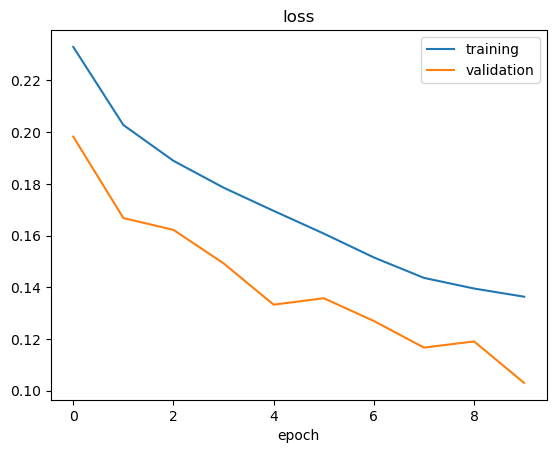

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')

In [91]:
import socketio

In [92]:
import eventlet

In [93]:
from flask import Flask

In [95]:
from PIL import Image

In [96]:
import base64

In [97]:
from io import BytesIO

In [99]:
from tensorflow.keras.models import load_model

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
sio = socketio.Server()
app = Flask(__name__)
maxSpeed = 10
def preProcess(img):
    img = img[60:135,:,:]
    img = cv2.cvtCOLOR(img,cv2.COLOR_RGB2YUV)
    img = GaussianBlur(img, (3,3), 0)
    img = cv2.resize(img,(200,66))
    img = img/255
    return img

@sio.on('telemetry')
def telemetry(sid,data):
    speed = float(data['speed'])
    image = Image.open(BytesIO(base64.b64decode(data['image'])))
    image = np.asarray(image)
    image = preProcess(image)
    image = np.array([image])
    steering = float(model.predict(image))
    throttle = 1.0 -speed / maxSpeed
    print('{} {} {}'.format(steering,throttle,speed))
    sendControl(steering,throttle)
    
@sio.on('connect')
def connect(sid,environ):
    print('connected')
    sendControl(0,0)
    
def sendControl(steering,throttle):
    sio.emit('steer', data = {'steering_angle':steering.__str__(),'throttle':__str__()})
    
if __name__ == '__main__':
    model = load_model('model.h5')
    app = socketio.Middleware(sio,app)
    eventlet.wsgi.server(eventlet.listen(('localhost',4567)),app)

(29380) wsgi starting up on http://127.0.0.1:4567
(29380) accepted ('127.0.0.1', 59507)
127.0.0.1 - - [03/Jun/2023 16:24:38] "GET /socket.io/?EIO=4&transport=websocket HTTP/1.1" 200 0 15.368597
